In [1]:
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%load_ext autoreload
%autoreload 2

In [2]:
# interp_metrics
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statistics, math, matplotlib
import seaborn as sns
from itertools import combinations

matplotlib.rcParams.update({'font.size': 30})



In [3]:
# Utility functions
def center_scale(l):
    cs_l = []
    for val in l:
        cs_l.append((val - statistics.mean(l))/statistics.pstdev(l))
    return(cs_l)

In [4]:
# # Run this block for table 1

# run_dict = {}
# vg = 'gsea_table1'
# lr_dir = '../../data/{}/lr/pathway_level_data_snps72819/'.format(vg)
# rf_dir = '../../data/{}/rf/pathway_level_data_snps72819/'.format(vg)
# run_dict['log_reg_weak']={'name':'log_reg_weak', 
#                           'file_naming':'GSEA_s{}_ord_enrichmentScore_weak_coefs.csv',
#                           'dir': lr_dir}
# run_dict['log_reg_weak_15k']={'name':'log_reg_weak_15k', 
#                           'file_naming':'GSEA_s{}_ord_enrichmentScore_weak_coefs_15k.csv',
#                           'dir': lr_dir}
# run_dict['log_reg_strong_coefs']={'name':'log_reg_strong_coefs', 
#                           'file_naming':'GSEA_s{}_ord_enrichmentScore_strong_coefs.csv',
#                           'dir': lr_dir}
# run_dict['log_reg_strong_coefs_15k']={'name':'log_reg_strong_coefs_15k', 
#                           'file_naming':'GSEA_s{}_ord_enrichmentScore_strong_coefs_15k.csv',
#                           'dir': lr_dir}
# run_dict['rand_forest']={'name':'rand_forest', 
#                           'file_naming':'GSEA_s{}_ord_enrichmentScore_feature_importances.csv',
#                           'dir': rf_dir}
# run_dict['rand_forest_15k']={'name':'rand_forest_15k', 
#                           'file_naming':'GSEA_s{}_ord_enrichmentScore_feature_importances_15k.csv',
#                           'dir': rf_dir}

In [5]:
# Run this block for versions 2 or 3

run_dict = {}
vg = 'gsea_table2'
# vg = 'gsea_table3'

lr_dir = '../../data/{}/lr/pathway_level_data_snps72819/'.format(vg)
rf_dir = '../../data/{}/rf/pathway_level_data_snps72819/'.format(vg)
run_dict['log_reg']={'name':'Logistic Regression', 
                          'file_naming':'GSEA_s{}_ord_enrichmentScore_coefs.csv',
                          'dir': lr_dir}
run_dict['rand_forest']={'name':'Random Forest', 
                          'file_naming':'GSEA_s{}_ord_enrichmentScore_coefs.csv',
                          'dir': rf_dir}

In [6]:
for mname in run_dict:
    df_c_gsea = pd.DataFrame()
    for seed in range(5):
        c_gsea = pd.read_csv(run_dict[mname]['dir'] + run_dict[mname]['file_naming'].format(seed), usecols=["Description", "qvalues"]).set_index('Description')
        c_gsea.columns = ['qvalues_{}'.format(seed)]
        df_c_gsea = df_c_gsea.join(c_gsea, how='outer')
        
    df_c_gsea['qvalues_mean'] = df_c_gsea.mean(axis=1)
    run_dict[mname]['df']=df_c_gsea

ind_list = [set(run_dict[x]['df'].index) for x in run_dict]  
overlap_pathways = ind_list[0].intersection(*ind_list)
print(len(overlap_pathways))


for mname in run_dict:
    df_c_gsea = run_dict[mname]['df'].loc[overlap_pathways]
    df_c_gsea = df_c_gsea.sort_values(by=['qvalues_mean'], ascending=True)
    run_dict[mname]['df']=df_c_gsea
    
# assert len(df_lr_gsea.index)==len(df_rf_gsea.index), 'check pathways are identical'
df_rand_control = run_dict[list(run_dict.keys())[0]]['df'].sample(frac=1)
run_dict['rand_control']={'name':'Random Control', 'df':df_rand_control}

793


# Ranked search terms

In [7]:
# Resources: https://www.webmd.com/diabetes/diabetes-glossary-terms
#            https://www.endocrineweb.com/conditions/diabetes/diabetes-glossary
#            GOOGLED "Canonical pathways CP Msigdb diabetes" and used words where 
#                    descriptor/definition had diabetes in the name

# NOTE: CHREBP IS LINKED WITH TYEP 2 DIABETES
list_terms = ["AUTOANTIBODY", "AUTOIMMUNE", "IMMUNE", "DIABETES", "INSULIN-DEPENDENT", 
              "JUVENILE-ONSET", "TYPE_1", "BASAL", "BOLUS", "INSULIN", "ENDOCRINE",
             "AMPK", "PPAR", "RAS", "MEK", "ERK", "LEPTIN", "CHREBP", "PGC1A", 
              "PANCREATIC"] 

list_method_names = [run_dict[x]['name'] for x in run_dict]
pathway_name_lists = [run_dict[x]['df'].index.to_list() for x in run_dict]
# list_method_names = ['Logistic Regression', 'Random Forest', 'Random Control']
# pathway_name_lists = [df_lr_gsea.index.to_list(),df_rf_gsea.index.to_list(), df_rand_control.index.to_list()]

df_search_term_rank = pd.DataFrame(float('nan'), index=list_terms, columns=list_method_names)

for term in list_terms:    
    print(term)
    for method_name, rank in zip(list_method_names, pathway_name_lists):
        print(" ",method_name)
        #index = [idx for idx, s in enumerate(rank) if term in s][0]
        found=0
        for idx, s in enumerate(rank):
            #print(idx, s)
            if (term in s or term.lower() in s) and found==0:
                found=1
                print("  ", method_name, idx)
                df_search_term_rank[method_name][term] = idx

AUTOANTIBODY
  Logistic Regression
  Random Forest
  Random Control
AUTOIMMUNE
  Logistic Regression
  Random Forest
  Random Control
IMMUNE
  Logistic Regression
   Logistic Regression 226
  Random Forest
   Random Forest 41
  Random Control
   Random Control 69
DIABETES
  Logistic Regression
  Random Forest
  Random Control
INSULIN-DEPENDENT
  Logistic Regression
  Random Forest
  Random Control
JUVENILE-ONSET
  Logistic Regression
  Random Forest
  Random Control
TYPE_1
  Logistic Regression
  Random Forest
  Random Control
BASAL
  Logistic Regression
  Random Forest
  Random Control
BOLUS
  Logistic Regression
  Random Forest
  Random Control
INSULIN
  Logistic Regression
   Logistic Regression 41
  Random Forest
   Random Forest 46
  Random Control
   Random Control 86
ENDOCRINE
  Logistic Regression
  Random Forest
  Random Control
AMPK
  Logistic Regression
   Logistic Regression 385
  Random Forest
   Random Forest 387
  Random Control
   Random Control 420
PPAR
  Logistic Regr

In [8]:
df_search_term_rank=df_search_term_rank.dropna(axis=1, how='all')

df_search_term_rank_cent_scaled = df_search_term_rank.apply(center_scale, axis=0)

# Format for plotting
max_rank = df_search_term_rank.max().max()+10
df_search_term_rank['term'] = df_search_term_rank.index

# Reformatting counts to plot
df_search_term_rank_reformatted = df_search_term_rank.melt(id_vars = 'term').dropna()
# df_search_term_rank_NO_LR_reformatted = df_search_term_rank_NO_LR.melt(id_vars = 'term').dropna()

# all non-NA terms
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_search_term_rank_reformatted)

          term             variable  value
2       IMMUNE  Logistic Regression  226.0
9      INSULIN  Logistic Regression   41.0
11        AMPK  Logistic Regression  385.0
12        PPAR  Logistic Regression  236.0
13         RAS  Logistic Regression   42.0
15         ERK  Logistic Regression  475.0
16      LEPTIN  Logistic Regression  511.0
17      CHREBP  Logistic Regression  208.0
18       PGC1A  Logistic Regression  267.0
19  PANCREATIC  Logistic Regression  319.0
22      IMMUNE        Random Forest   41.0
29     INSULIN        Random Forest   46.0
31        AMPK        Random Forest  387.0
32        PPAR        Random Forest  215.0
33         RAS        Random Forest   53.0
35         ERK        Random Forest  475.0
36      LEPTIN        Random Forest  510.0
37      CHREBP        Random Forest  113.0
38       PGC1A        Random Forest  267.0
39  PANCREATIC        Random Forest  318.0
42      IMMUNE       Random Control   69.0
49     INSULIN       Random Control   86.0
51        A

In [9]:
# df_search_term_rank.to_csv('../../data/df_search_term_rank_v3.csv')
# df_search_term_rank_reformatted.to_csv('../../data/df_search_term_rank_reformatted_v3.csv')

<Axes:>

<Axes:xlabel='variable', ylabel='value'>

(735.0, -20.0)

(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Random Control')])

Text(0, -5, 'n: 10')

Text(1, -5, 'n: 10')

Text(2, -5, 'n: 10')

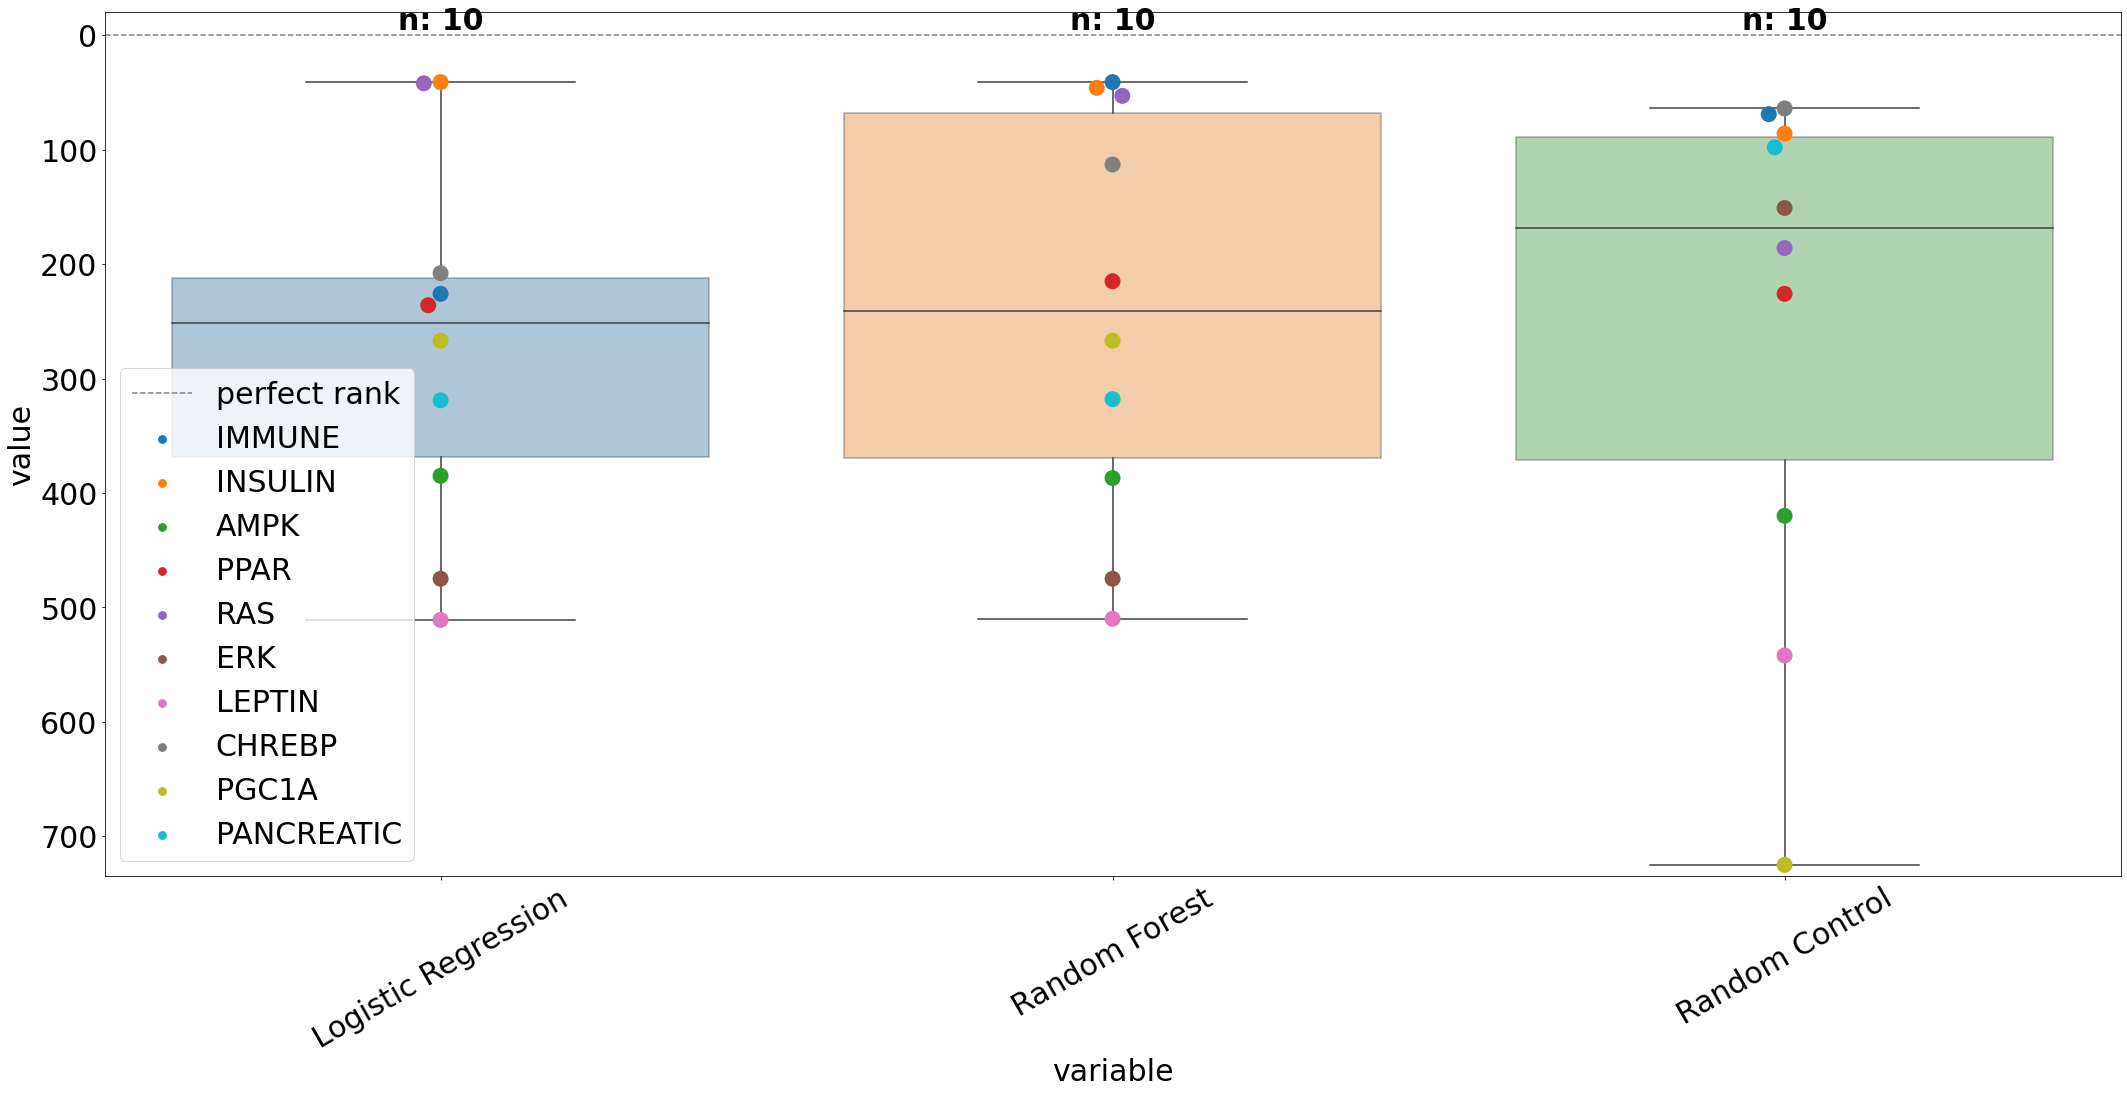

In [10]:
# Plot centered and scaled ranks
fig = plt.figure(figsize =(28, 12))
ax = fig.add_axes([0, 0, 1, 1])

# plt.xticks([1, 2, 3], list_method_names)
# ax.set_title('Centered and Scaled Method Ranks')
# ax.set_xlabel('lists')
#ax.set_ylim(-2,100)
# ax.set_ylabel('centered and scaled ranks')

ypoints = 0.2
plt.axhline(ypoints, 0, 1, label='perfect rank', color='grey', linestyle='dashed')

sns.boxplot(data=df_search_term_rank, boxprops=dict(alpha=.4))
sns.swarmplot(data=df_search_term_rank_reformatted, x="variable",y="value", size=16, hue="term", edgecolors='b')

plt.legend(loc='lower left')
plt.ylim(math.ceil(max_rank), -20)
plt.xticks(rotation=30)

# Calculate number of obs per group & median to position labels
medians = df_search_term_rank_reformatted.groupby(['variable'])['value'].median().values# df.groupby(['species'])['sepal_length'].median().values
nobs = df_search_term_rank_reformatted['variable'].value_counts().values # df['species'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            -5,
            nobs[tick],
            horizontalalignment='center',
            size='medium',
            color='black',
            weight='bold')
    
# for i, language in enumerate (languages):
#     plt.text(avg_salary[i]+0.2, candidates[i]+0.2, language)